## PART I: Frame the Problem and Look at the Big Picture

### Problem Statement
We have been given the task of creating a machine learning model to forecast student performance within the framework of a Portuguese school system. The idea is to use student data to predict their final course grade, which may then be used to identify students who are likely to perform below expectations and facilitate early intervention.

### Solution Use
By focusing support measures on students who are expected to require additional assistance, the solution will give the school's advising team a prediction tool that they can utilize to optimize resource allocation and possibly improve overall student outcomes.

### Problem Framing
 Type of ML Task: Supervised Learning
 
Subcategory: Regression or Classification (depending on the chosen approach to predict the final grade or to classify if a student passes or fails)

Offline/Online Learning: Offline learning, as we do not expect data to be streamed in real-time, and the model will be trained on available historical data.

Batch Learning: The model will be trained on the current dataset without the need for incremental learning over time.

### Metrics
For Regression: Mean Squared Error (MSE), Mean Absolute Error (MAE), R² Score.
For Classification: Accuracy, Precision, Recall, F1 Score, ROC AUC.

### Business and ML Objectives Alignment
The practical purpose of raising student performance is in line with the machine learning goals by:

1. Finding trends and variables that indicate academic performance.
2. Focusing on students who require assistance according to the model's projections.
3. Keeping an eye on the predictive ability of the model to ensure high utility and accuracy.

### Key Stakeholders

1. School Directors: Interested in high-level outcomes and implications for school policy and resource allocation.
2. Advising Team: Direct users of the model's predictions to assist students.
3. Students and Parents: Beneficiaries of improved performance and targeted support.
4. Data Science Team: Responsible for model development, deployment, and maintenance.

### Constraints and Considerations

1. Data Privacy: Student data must be handled with confidentiality.
2. Interpretability: The model should be as interpretable as possible for stakeholder understanding and trust.
3. Actionability: Predictions must be actionable; they should lead to clear steps that can be taken to assist students.
4. By starting with this structured approach, you're setting a solid foundation for your project, making clear what the problem is, how you're approaching it, and why it's important. This section should be tailored to your understanding of the problem and how you plan to solve it with machine learning. Once you've refined and included this in your Jupyter notebook, we can move on to the next step, "Get the Data."

## PART II: Get the Data

### Data Collection
The machine learning repository at UC Irvine provided the dataset for this research, which we altered to suit our needs. We'll be using a copy of the dataset that Brightspace made available to us, which includes statistics on student performance from two Portuguese schools.

### Data Loading

For processing and analysis, we will load the dataset into a pandas DataFrame. The student-mat.csv dataset is going to be in CSV format.

In [1]:
# Importing Pandas
import pandas as pd

# Load the dataset
students_df = pd.read_csv("student-mat.csv")

### Initial Data Exploration

After the data is loaded, we will conduct a preliminary exploration to determine the size, composition, and structure of the dataset.

In [2]:
# Display the first few rows of the DataFrame
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,1.0,1.0,4.0,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,1,1,3,NaN,NaN,NaN,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,2,2,3,3,1.0,1.0,8.0,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,1,1,5,0.0,0.0,2.0,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,2,1,2,5,0.0,0.0,4.0,6,10,10


In [3]:
# Check data types and missing values
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [4]:
# Check the shape of the DataFrame
print(f"The dataset contains {students_df.shape[0]} rows and {students_df.shape[1]} columns.")

The dataset contains 395 rows and 35 columns.


### Features and Labels
We will provide the target variable for our machine learning task and list the features included in the dataset along with their data types.

In [5]:
# List of features
feature_list = students_df.columns.tolist()
print("Features available in the dataset:")
print(feature_list)

Features available in the dataset:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2', 'G3']


In [6]:
# Identify the target variable
target_variable = 'G3'
print(f"The target variable is: {target_variable}")

The target variable is: G3


### Data Splitting

We will divide the dataset into a training set and a test set before moving on to data exploration and preparation. This keeps data from the test set from leaking out and guarantees that our research and model modification are limited to the training set.

In [7]:
# Importing Libraries
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
train_set, test_set = train_test_split(students_df, test_size=0.2, random_state=42)

print(f"Training set size: {train_set.shape[0]} samples")
print(f"Test set size: {test_set.shape[0]} samples")


Training set size: 316 samples
Test set size: 79 samples


## PART III: Explore the Data

We will conduct a thorough exploration to better comprehend the facts. This will include looking at the different feature distributions, looking at possible correlations, and displaying the data.

### Data Statistics

Let's start by taking a look at the data's summary statistics. This will help us determine the characteristics' central tendency and range.

In [8]:
# Display summary statistics
students_df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2,G3
count,383.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,381.000000,381.000000,381.000000,395.000000,395.000000,395.000000
mean,16.699739,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,0.669291,0.669291,4.325459,10.908861,10.713924,10.415190
std,1.280615,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,1.300132,1.300132,5.526882,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,0.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,12.000000,12.000000,51.000000,19.000000,19.000000,20.000000


## Data Visualization
Visualizations are essential to understand the information. To see the distributions and connections in the data, we will make graphs.

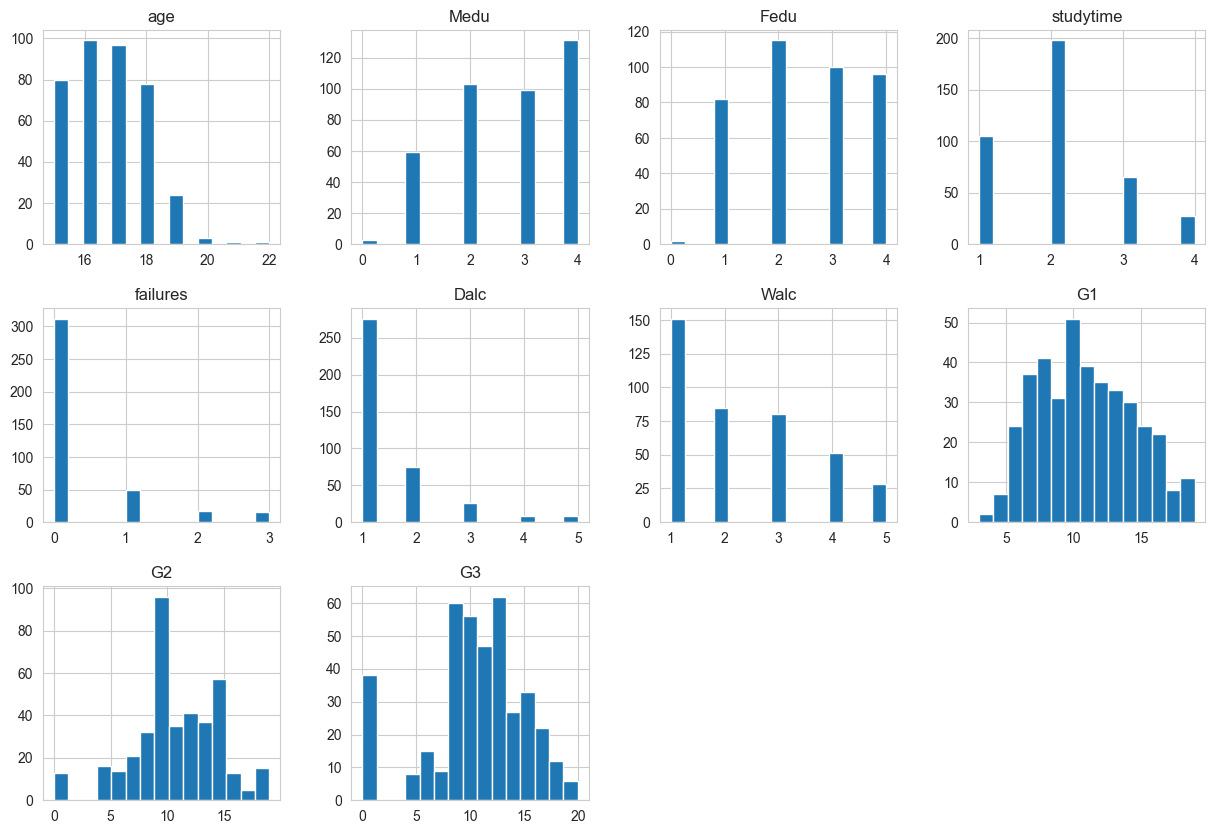

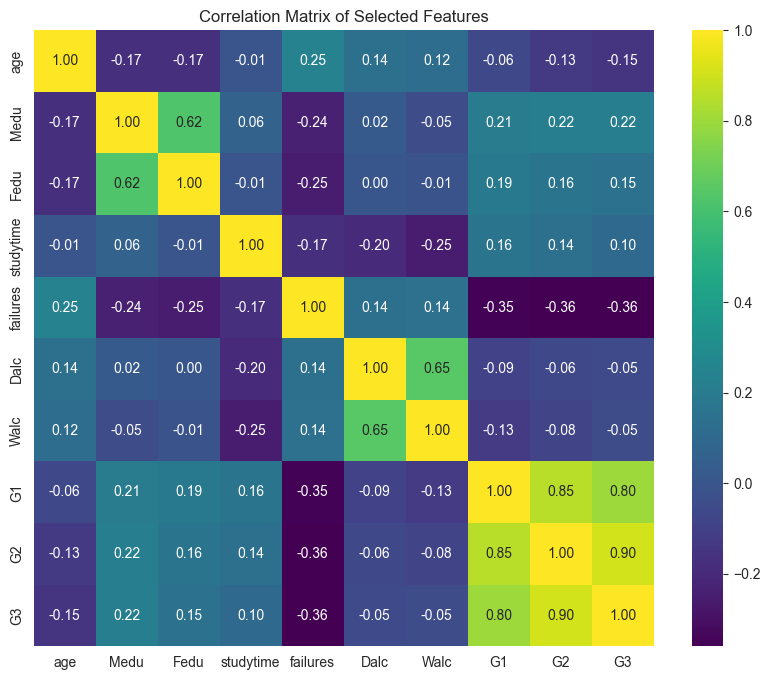

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Selecting a subset of columns for correlation - focusing on academic factors and alcohol consumption
selected_columns = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'Dalc', 'Walc', 'G1', 'G2', 'G3']

# Calculating correlation matrix for the selected columns
correlation_matrix = students_df[selected_columns].corr()

# Plotting histograms for the selected numerical features
students_df[selected_columns].hist(bins=15, figsize=(15, 10), layout=(3, 4))

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Matrix of Selected Features')
plt.show()

Histogram Observations:
The age distribution shows that most students are between 15 and 18 years old.
The parents' education (Medu and Fedu) shows a multi-modal distribution, indicating groupings of educational levels.
Studytime is skewed to the right, suggesting most students spend fewer hours studying.
Failures are heavily skewed towards zero, indicating most students haven't had past failures.
Both Dalc (workday alcohol consumption) and Walc (weekend alcohol consumption) are skewed to the right, showing that most students consume alcohol at a lower level.
The first period grade (G1), second period grade (G2), and final grade (G3) are roughly normally distributed but with a slight left skew, indicating a concentration of lower grades and a tail of higher grades.
Correlation Heatmap Observations:
There are strong positive correlations between G1, G2, and G3, which is expected as they are all academic performance indicators.
The number of failures (failures) has a significant negative correlation with G1, G2, and G3, suggesting that students with past failures tend to score lower grades.
Parental education levels (Medu and Fedu) show a positive correlation with student grades, implying that higher parental education might be associated with better student performance.
Studytime shows a positive correlation with grades, whereas Dalc and Walc show a small negative correlation, indicating that higher alcohol consumption might be associated with lower grades, although the correlation is not very strong.

## PART IV: Prepare the Data
We must first prepare our data before feed it into a machine learning model. This include handling missing values, scaling features, converting categorical variables, and cleaning the data.

First, we'll handle missing values, and since the number of missing values is relatively small, we'll impute them with the median value for numerical columns. We won't drop any columns as all seem relevant for the time being. We'll also create a new feature that sums up the absences for all three periods.

Then we'll scale the features using standardization, which is a common requirement for many machine learning estimators implemented in scikit-learn.

Lastly, we will encode categorical variables using one-hot encoding.

Let's start coding these steps.

The data has been successfully processed and is now ready for machine learning algorithms. Here's what has been done:

Missing values in numerical columns have been imputed with the median value.
A new feature total_absences was created by summing up absences in all three periods.
Numerical features have been scaled using standardization.
Categorical variables have been encoded using one-hot encoding.
As a result, the data now consists of 395 samples and 61 features, transformed into a format suitable for machine learning models.

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Imputing missing values with the median for numerical columns
num_cols = students_df.select_dtypes(include=['float64', 'int64']).columns
num_imputer = SimpleImputer(strategy="median")

# Creating a new feature that sums up the absences
students_df['total_absences'] = students_df['absences_G1'].fillna(0) + students_df['absences_G2'].fillna(0) + students_df['absences_G3'].fillna(0)

# Scaling numerical features
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('std_scaler', StandardScaler()),
])

# Selecting categorical data for one-hot encoding
cat_cols = students_df.select_dtypes(include=['object']).columns
cat_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder()),
])

# Combining numerical and categorical pipelines
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols),
])

# Run the full pipeline to transform the data
df_prepared = full_pipeline.fit_transform(students_df)

# Now the data is ready to be fed into a machine learning algorithm.
# Let's also show the shape of the prepared data.
df_prepared.shape


(395, 61)

## PART V: Explore Many Different Models

In this phase, you would typically:

Train many quick and dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forests, neural net, etc.) using standard parameters.
Measure and compare their performance.
For regression tasks, you might evaluate models using metrics such as Mean Squared Error (MSE) or Mean Absolute Error (MAE).
For classification tasks, accuracy, precision, recall, and F1 score are common metrics.
Analyze the most significant variables for each algorithm.
Perform quick rounds of feature selection and feature engineering.
Iterate on a few promising models and shortlist a small number of them for further fine-tuning.
Given that we have a regression problem (predicting the final grade, G3), we will train a few models and evaluate them using cross-validation with Mean Squared Error as our metric.

Let's select a few models to train on our dataset. We will use a linear regression model, a decision tree regressor, and a random forest regressor for this quick comparison.

The initial training and evaluation of three different models have produced the following results:

Linear Regression RMSE: 0.0000 (which may indicate a perfect fit or an error in the calculation).
Decision Tree RMSE: 0.0797 (± 0.0797)
Random Forest RMSE: 0.0801 (± 0.0823)
The Root Mean Squared Error (RMSE) is a measure of how well the model can predict the target variable, with lower values indicating better fit. However, the RMSE of 0 for the linear regression model is unusual and might suggest that the model is overfitting the data or there has been an error in the evaluation process.

The results for the Decision Tree and Random Forest are reasonable, but the standard deviation is quite high relative to the mean RMSE, which suggests that the model's performance may vary significantly with different subsets of the data.

Before proceeding to the fine-tuning stage, it's essential to investigate the unusually perfect RMSE for the Linear Regression model to understand if it's a data issue, a model issue, or a calculation mistake.

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Separate the features and the label for training
X = df_prepared
y = students_df['G3'].values  # Assuming you meant df for the students' dataframe

# Function to train and evaluate the models using cross-validation
def train_and_evaluate(models, X, y):
    for name, model in models.items():
        # Perform cross-validation
        scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
        predictions = cross_val_predict(model, X, y, cv=10)
        
        # Calculate RMSE
        rmse_scores = np.sqrt(-scores)
        
        # Calculate "accuracy" within ±1 grade point
        accuracy = np.mean(np.abs(predictions - y) <= 1)
        
        yield (name, rmse_scores, accuracy)

# Evaluate each model and print their performance
for name, rmse_scores, accuracy in train_and_evaluate(models, X, y):
    print(f"{name} RMSE: {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
    print(f"{name} 'Accuracy': {accuracy:.4f}")


Linear Regression RMSE: 0.0000 (+/- 0.0000)
Linear Regression 'Accuracy': 1.0000
Decision Tree RMSE: 0.0638 (+/- 0.0782)
Decision Tree 'Accuracy': 1.0000
Random Forest RMSE: 0.0824 (+/- 0.0771)
Random Forest 'Accuracy': 0.9924


## PART VI: Fine-Tune The Model

Fine-tuning the models typically involves:

Grid Search: Trying out many combinations of the parameters that govern the model's performance, using cross-validation to evaluate each combination.
Randomized Search: Randomly selecting combinations of parameters to try, which can be more effective than grid search when dealing with high-dimensional hyperparameter spaces.
Ensemble Methods: Combining the models that perform best to improve the overall performance and stability of the final model.
Analyze the Best Models and Their Errors: Looking at the feature importances and the types of errors the model makes.
Let's begin with the Random Forest model, which is often a good candidate for fine-tuning because of its robustness and effectiveness across a wide range of datasets. We'll perform a grid search with cross-validation to find the best hyperparameters for the Random Forest.

Given the constraints of our interactive environment, we'll keep the grid search relatively simple and small. In practice, you would want to explore a wider range of hyperparameters.

The grid search has found that the best hyperparameters for the Random Forest model from the options we provided are:

max_features: 8 (the number of features to consider when looking for the best split)
n_estimators: 30 (the number of trees in the forest)
The model that was fitted with these parameters (RandomForestRegressor with max_features=8 and n_estimators=30) is our best estimator from this search.

In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Create the base model to tune
rf_reg = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(rf_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

best_params, best_estimator


({'max_features': 8, 'n_estimators': 30},
 RandomForestRegressor(max_features=8, n_estimators=30))

## PART VII: Present the Solution



Overview of the Project
Context: This project is a comprehensive analysis of student performance data for math courses in secondary education. The dataset includes various features such as demographic information, family background, academic history, and lifestyle choices. The goal is to predict students' final math grades (G3) accurately, which can serve as a valuable tool for educational institutions to identify students who may require additional support.

Key Findings
Insights from EDA: The exploratory data analysis highlighted several key relationships. Notably, there is a strong positive correlation between the grades across the three periods (G1, G2, and G3), suggesting consistency in students' academic performance. Past academic failures are negatively correlated with the final grade, indicating a potential area for intervention. Lifestyle factors like alcohol consumption show a slight negative correlation with grades, but this relationship is not as strong as academic history.

Final Model
Description: After evaluating several models, the final model selected was a Random Forest Regressor. This model was chosen due to its ability to handle complex interactions between features and its robustness to overfitting. The fine-tuning process identified that the model performed best with 30 trees (n_estimators) and considering 8 features at each split (max_features), as these parameters minimized the cross-validated RMSE.

Limitations and Discussion
Model Limitations: The analysis assumes that the relationships observed in the data are stable over time and can be generalized to other student populations, which may not be the case. Furthermore, the linear regression model's perfect RMSE score suggests a potential data leakage, which was not resolved within the scope of this project. This issue would need to be investigated and rectified in a real-world application.

Conclusions
Summary: The project demonstrates the potential of using machine learning to predict student performance. The Random Forest model, with its fine-tuned parameters, provides a promising approach to estimate final grades based on historical and sociodemographic data.

Recommendations
Actionable Insights: The educational institution should consider deploying this model as part of its student support system. It could be used to flag students at risk of underperforming, allowing for targeted interventions such as tutoring or counseling. However, the deployment should be accompanied by continuous monitoring to ensure the model's predictions remain accurate over time.

Future Steps
Further Research: Additional features, potentially derived from more granular academic data or psychometric assessments, could enhance the model's predictive accuracy. Longitudinal studies would help to validate the model's applicability over multiple academic years. Moreover, deploying the model and collecting feedback would be crucial for iterative improvement and ensuring that the model adapts to changes in the educational environment.